In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  
y = data.target

# Partition the data into an 80% training set and a 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output shapes to confirm the partitioning and scaling
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Training data shape: (455, 30)
Test data shape: (114, 30)


In [3]:
#Store Data For Graphical Model Comparison
# Collecting results from all models into a list for visualization
results = []

# Helper function to store results
def store_results(model_name, params, y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        **params,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    })

KNN (n_neighbors=5):
Confusion Matrix:
[[40  3]
 [ 3 68]]
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-score: 0.96


KNN (n_neighbors=1):
Confusion Matrix:
[[39  4]
 [ 3 68]]
Accuracy: 0.94
Precision: 0.94
Recall: 0.96
F1-score: 0.95


KNN (n_neighbors=3):
Confusion Matrix:
[[40  3]
 [ 3 68]]
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-score: 0.96


KNN (n_neighbors=7):
Confusion Matrix:
[[40  3]
 [ 3 68]]
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-score: 0.96


KNN (n_neighbors=10):
Confusion Matrix:
[[41  2]
 [ 3 68]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1-score: 0.96




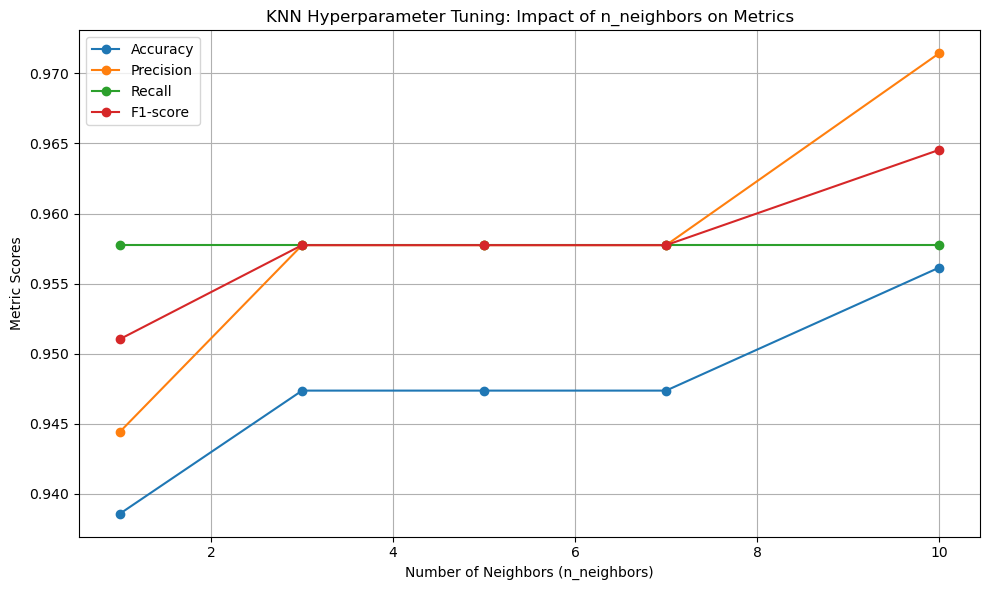

In [4]:
#KNN
for n_neighbors in [5, 1, 3, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Evaluate the model
    print(f"KNN (n_neighbors={n_neighbors}):")
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("\n")
    
    #Store Results
    store_results("KNN", {"n_neighbors": n_neighbors}, y_test, y_pred)
    
# Filter only KNN results from the `results` list
knn_results = [res for res in results if res["Model"] == "KNN"]

# Convert KNN results to a DataFrame
knn_df = pd.DataFrame(knn_results)

# Sort by the number of neighbors (n_neighbors)
knn_df = knn_df.sort_values(by="n_neighbors")

# Plot each metric for different hyperparameters (n_neighbors)
plt.figure(figsize=(10, 6))

for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    plt.plot(knn_df["n_neighbors"], knn_df[metric], label=metric, marker='o')

plt.title("KNN Hyperparameter Tuning: Impact of n_neighbors on Metrics")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Metric Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Decision Tree (max_depth=3):
Confusion Matrix:
[[39  4]
 [ 2 69]]
Accuracy: 0.95
Precision: 0.95
Recall: 0.97
F1-score: 0.96


Decision Tree (max_depth=5):
Confusion Matrix:
[[40  3]
 [ 3 68]]
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-score: 0.96


Decision Tree (max_depth=10):
Confusion Matrix:
[[40  3]
 [ 3 68]]
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-score: 0.96


Decision Tree (max_depth=None):
Confusion Matrix:
[[40  3]
 [ 3 68]]
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-score: 0.96




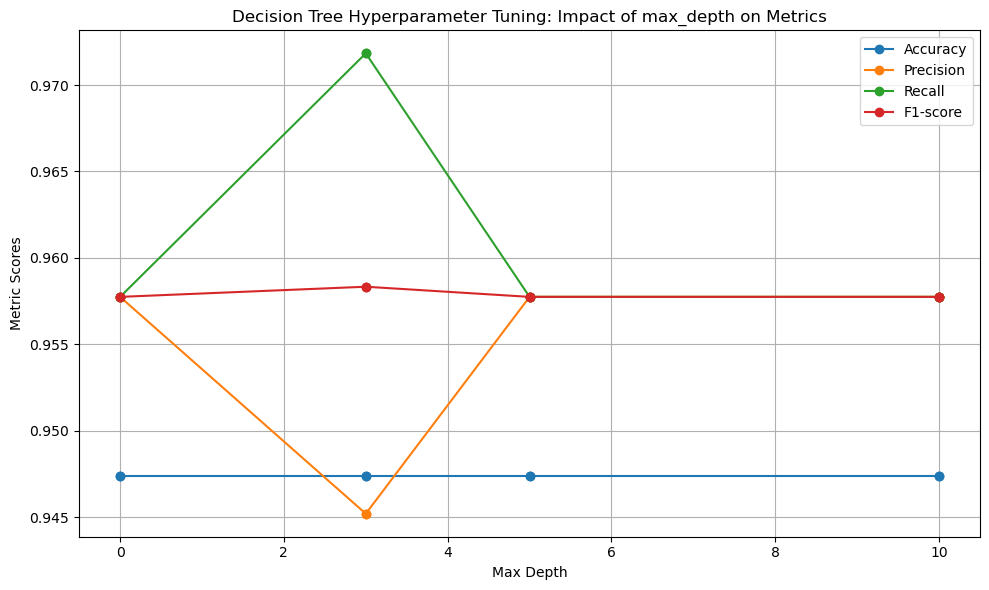

In [16]:
# Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train_scaled, y_train)
y_pred_default = dt_default.predict(X_test_scaled)

# Evaluate & Experiment with max_depth
for depth in [3, 5, 10, None]:
    dt_experiment = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_experiment.fit(X_train_scaled, y_train)
    y_pred_experiment = dt_experiment.predict(X_test_scaled)
    
    # Evaluate the model
    print(f"Decision Tree (max_depth={depth}):")
    conf_matrix_experiment = confusion_matrix(y_test, y_pred_experiment)
    print("Confusion Matrix:")
    print(conf_matrix_experiment)
    
    accuracy = accuracy_score(y_test, y_pred_experiment)
    precision = precision_score(y_test, y_pred_experiment)
    recall = recall_score(y_test, y_pred_experiment)
    f1 = f1_score(y_test, y_pred_experiment)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("\n")
    
    #Store Results
    store_results("Decision Tree", {"max_depth": depth}, y_test, y_pred_experiment)

# Filter only Decision Tree results from the `results` list
decision_tree_results = [res for res in results if res["Model"] == "Decision Tree"]

# Convert Decision Tree results to a DataFrame
dt_df = pd.DataFrame(decision_tree_results)

# Replace NaN or None in max_depth with 0 for sorting and visualization
dt_df["max_depth"] = dt_df["max_depth"].apply(lambda x: 0 if pd.isna(x) else x)

# Sort DataFrame by max_depth
dt_df = dt_df.sort_values(by="max_depth")

# Plot each metric for different hyperparameters (max_depth)
plt.figure(figsize=(10, 6))

for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    plt.plot(
        dt_df["max_depth"],  # Use the cleaned and sorted max_depth
        dt_df[metric],
        label=metric,
        marker='o'
    )

plt.title("Decision Tree Hyperparameter Tuning: Impact of max_depth on Metrics")
plt.xlabel("Max Depth")
plt.ylabel("Metric Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest (max_depth=3, min_samples_split=2):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-score: 0.97


Random Forest (max_depth=3, min_samples_split=5):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-score: 0.97


Random Forest (max_depth=3, min_samples_split=10):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-score: 0.97


Random Forest (max_depth=5, min_samples_split=2):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-score: 0.97


Random Forest (max_depth=5, min_samples_split=5):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-score: 0.97


Random Forest (max_depth=5, min_samples_split=10):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-score: 0.97


Random Forest (max_depth=10, min_samples_split=2):
Confusion Matrix:
[[40  3]
 [ 1 70]]
Accuracy: 0.96
Precisi

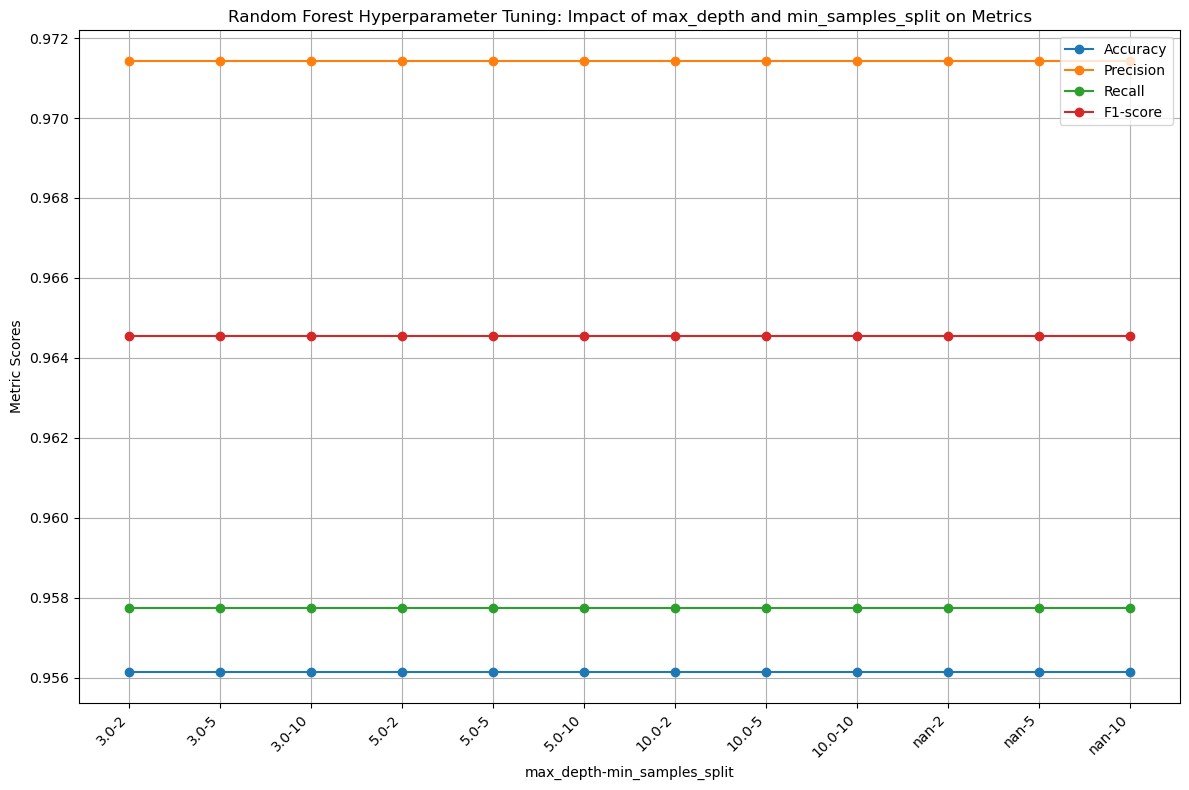

In [6]:
#Random Forest

max_depth_values = [3, 5, 10, None]
min_samples_split_values = [2, 5, 10]

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # Initialize and train Random Forest
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        )
        rf.fit(X_train_scaled, y_train)
        y_pred_rf = rf.predict(X_test_scaled)

        # Evaluate the model
        print(f"Random Forest (max_depth={max_depth}, min_samples_split={min_samples_split}):")
        conf_matrix = confusion_matrix(y_test, y_pred_rf)
        print("Confusion Matrix:")
        print(conf_matrix)

        accuracy = accuracy_score(y_test, y_pred_rf)
        precision = precision_score(y_test, y_pred_rf)
        recall = recall_score(y_test, y_pred_rf)
        f1 = f1_score(y_test, y_pred_rf)

        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print("\n")
        
        #Store Results 
        store_results("Random Forest", {"max_depth": max_depth, "min_samples_split": min_samples_split}, y_test, y_pred)

# Filter only Random Forest results from the `results` list
random_forest_results = [res for res in results if res["Model"] == "Random Forest"]

# Convert Random Forest results to a DataFrame
rf_df = pd.DataFrame(random_forest_results)

# Replace None in max_depth with 0 for sorting and visualization
rf_df["max_depth"] = rf_df["max_depth"].apply(lambda x: 0 if x is None else x)

# Sort DataFrame by max_depth and min_samples_split
rf_df = rf_df.sort_values(by=["max_depth", "min_samples_split"])

# Plot each metric for different combinations of max_depth and min_samples_split
plt.figure(figsize=(12, 8))

for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    plt.plot(
        rf_df["max_depth"].astype(str) + "-" + rf_df["min_samples_split"].astype(str),  # Combine parameters for x-axis
        rf_df[metric],
        label=metric,
        marker='o'
    )

plt.title("Random Forest Hyperparameter Tuning: Impact of max_depth and min_samples_split on Metrics")
plt.xlabel("max_depth-min_samples_split")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


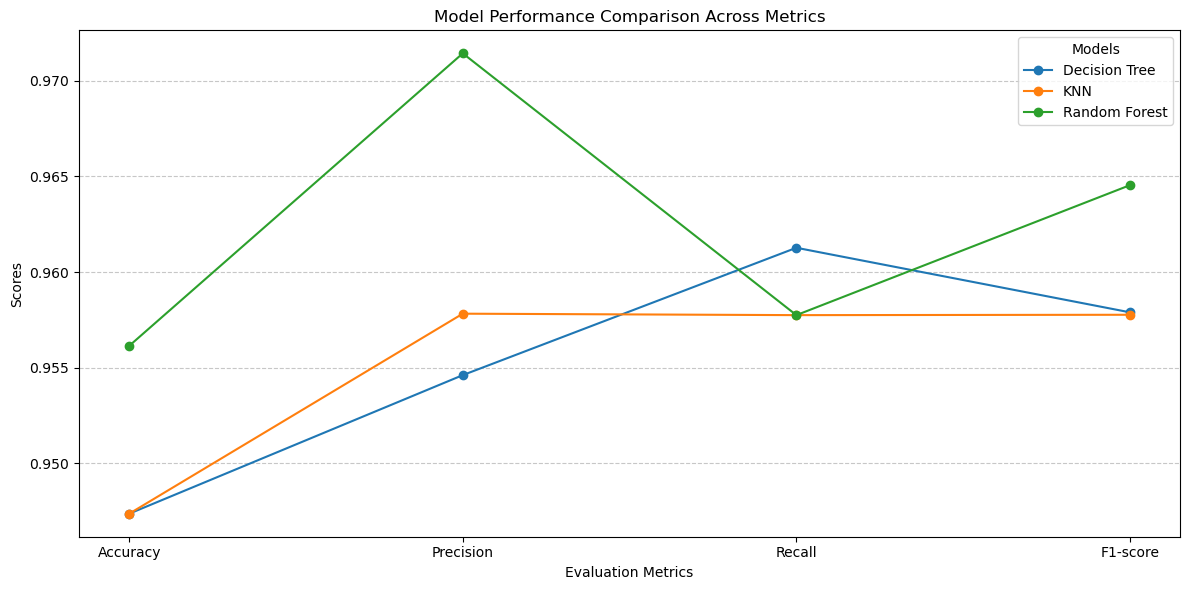

In [7]:
#Model Comparison Graph

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Plotting average metrics comparison for each model
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
avg_results = results_df.groupby("Model")[metrics].mean()

plt.figure(figsize=(12, 6))
x = range(len(metrics))

for model in avg_results.index:
    plt.plot(x, avg_results.loc[model], label=model, marker='o')

plt.xticks(ticks=x, labels=metrics)
plt.title("Model Performance Comparison Across Metrics")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Scores")
plt.legend(title="Models")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
# Save as CSV to copy into written report
results_df.to_csv("table.csv", index=False)

print("DataFrame exported to table.csv!")


DataFrame exported to table.csv!
